# Market Outlook
*A current analysis of the US market.* <br />
Starting of with Declaring the Dependencies

In [1]:
import pandas as pd
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np

%matplotlib inline
my_year_month_fmt = mdates.DateFormatter('%m/%y')
my_day_month_fmt = mdates.DateFormatter('%d/%m')

/Users/JacobClaessens/engg3130/anaconda2/envs/learningLib/lib/python2.7/site-packages/fix_yahoo_finance/__init__.py:43: DeprecationWarning: 
    Auto-overriding of pandas_datareader's get_data_yahoo() is deprecated and will be removed in future versions.
    Use pdr_override() to explicitly override it.
  DeprecationWarning)


Declaring the time range of analysis

In [2]:
today = "2017-07-30"
shortTerm = "2017-07-10"   #2 weeks
midTerm = "2017-04-03"  #3 months
longTerm = "2015-07-30"  # one year

Pull the data from Yahoo, and only use day that the secruties were traded. (Note: if the data is not loading correcting, try restarting the kernal or notebook)

In [3]:
data = pdr.get_data_yahoo(["SPY", "DIA", "QQQ", "ES", "AGG", "XLF", "XLK", "XLI", "XLB", "XLY", "XLV", "XLU", "XLP", "XLE", "IYT"], start=longTerm, end=today)
adjClose = data.ix['Adj Close']

allWeekdays = pd.date_range(start=midTerm, end=today, freq='B')
adjClose = adjClose.reindex(allWeekdays)
adjClose = adjClose.fillna(method='ffill')

[*********************100%***********************]  15 of 15 downloaded

/Users/JacobClaessens/engg3130/anaconda2/envs/learningLib/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


## The Major Indices
Graph the data of the biggest ETF's that track the major US indices. ETF's now make up billions of dollars in the Equity market, they dont just track the market performace very well, but they also influence the how the market behaves, influencing the price of sectors and individual stocks that they are supposed to be tracking.

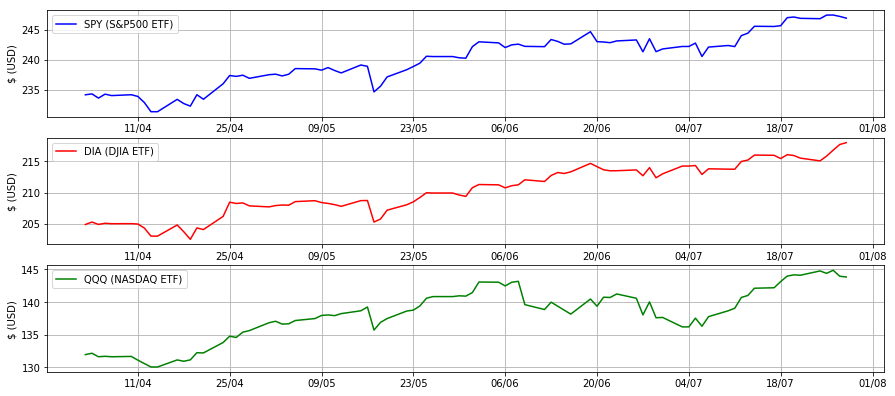

In [4]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(4,1,1)
ax.plot(adjClose['SPY'].index, adjClose['SPY'], label='SPY (S&P500 ETF)', color='b')
ax.set_ylabel('$ (USD)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_day_month_fmt)
ax.grid()

ax = fig.add_subplot(4,1,2)
ax.plot(adjClose['DIA'].index, adjClose['DIA'], label='DIA (DJIA ETF)', color='r')
ax.set_ylabel('$ (USD)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_day_month_fmt)
ax.grid()

ax = fig.add_subplot(4,1,3)
ax.plot(adjClose['QQQ'].index, adjClose['QQQ'], label='QQQ (NASDAQ ETF)', color='g')
ax.set_ylabel('$ (USD)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_day_month_fmt)
ax.grid()

## Bonds
Bond Exchange Traded Funds (ETF) are very popular security for indivdual investors because buying bonds in large lots is not practical for the non-instatuitional investor. Bonds value behave different then stocks. As the depend on bond majority, creditability, and interest rates.Without going into to much detail, as interest rates go up, a bonds value goes down, because the interest rates on the government bonds being sold now has a high yield then the bond you are selling. The works the other way though, if you have bond holding and interest rates go down, then investor will find your bonds more valuable. The AGG is the biggest bond ETF with a $242 Billion dollars under management.

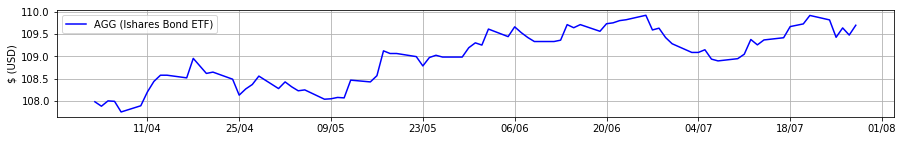

In [5]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(4,1,1)
ax.plot(adjClose['AGG'].index, adjClose['AGG'], label='AGG (Ishares Bond ETF)', color='b')
ax.set_ylabel('$ (USD)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_day_month_fmt)
ax.grid()

## Sectors
Whenever there is a bull market some sectors perform significantly better then others do, as wallstreet tends to favour certain sectors throughout a rally, and ignore others. Weather you are a value investor or growth person, know these trends is crucial to successfull investing as ETF tend to push stocks up or pull stocks down depending on the sector they are in at the present day.

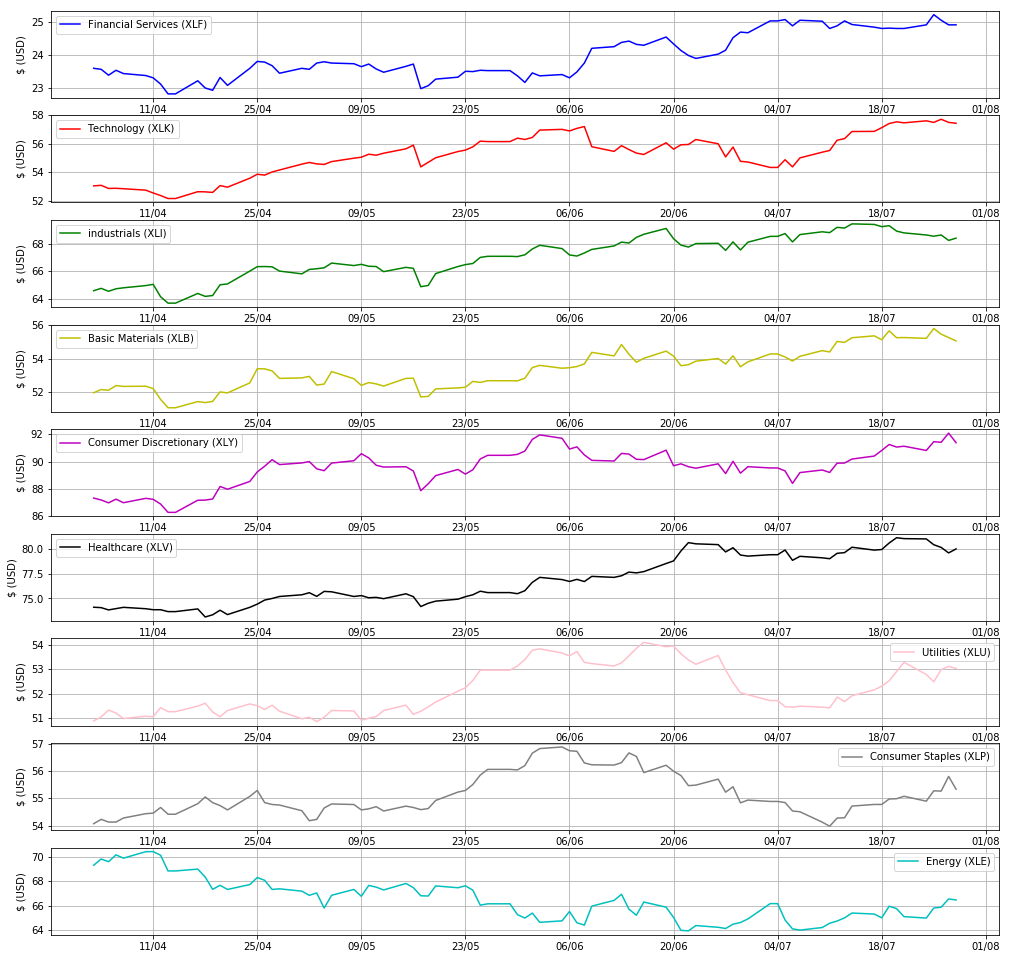

In [6]:
fig = plt.figure(figsize=(17,17))
def formatGraph():
    ax.set_ylabel('$ (USD)')
    ax.legend(loc='best')
    ax.xaxis.set_major_formatter(my_day_month_fmt)
    ax.grid()
    
ax = fig.add_subplot(9,1,1)
ax.plot(adjClose['XLF'].index, adjClose['XLF'], label='Financial Services (XLF)', color='b')
formatGraph()

ax = fig.add_subplot(9,1,2)
ax.plot(adjClose['XLK'].index, adjClose['XLK'], label='Technology (XLK)', color='r')
formatGraph()

ax = fig.add_subplot(9,1,3)
ax.plot(adjClose['XLI'].index, adjClose['XLI'], label='industrials (XLI)', color='g')
formatGraph()

ax = fig.add_subplot(9,1,4)
ax.plot(adjClose['XLB'].index, adjClose['XLB'], label='Basic Materials (XLB)', color='y')
formatGraph()

ax = fig.add_subplot(9,1,5)
ax.plot(adjClose['XLY'].index, adjClose['XLY'], label='Consumer Discretionary (XLY)', color='m')
formatGraph()

ax = fig.add_subplot(9,1,6)
ax.plot(adjClose['XLV'].index, adjClose['XLV'], label='Healthcare (XLV)', color='k')
formatGraph()

ax = fig.add_subplot(9,1,7)
ax.plot(adjClose['XLU'].index, adjClose['XLU'], label='Utilities (XLU)', color='pink')
formatGraph()

ax = fig.add_subplot(9,1,8)
ax.plot(adjClose['XLP'].index, adjClose['XLP'], label='Consumer Staples (XLP)', color='grey')
formatGraph()

ax = fig.add_subplot(9,1,9)
ax.plot(adjClose['XLE'].index, adjClose['XLE'], label='Energy (XLE)', color='c')
formatGraph()

## Honourable Mentions
- Indices can confirm each other. If stocks are going up because the underlying companies are business is good, then there will be more transporatation of goods in the economy. The increase in activity should equate to more profit for tansportation companies, thus moving the stock prices higher, confirming actual economic activity is occuring in the bull market. <br />
- Second, if the finicial industry downturns, it will drag the economy down with it like an anchor on a ship. We live in a debt based monetary system, if the banks tighten lending the economy will slow down as everyone pays with credit. Finicials are a biggest sector and should be treated as such.<br />
- Lastly is took look at companies earnings, ifcompanies making earnings targets and raising guidence for future, it confirms the bullish behavour in the sector
- From all the government reports, the number most worth noting amount of new hires for each month. Big investors grave growth, and if the report doesnt impress then you'll start to see bears come out.

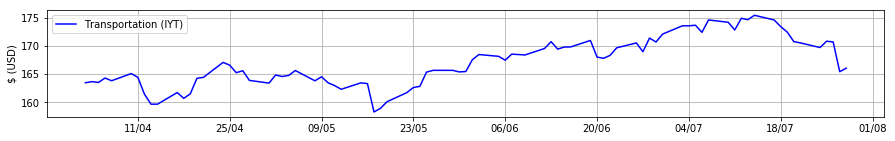

In [7]:
fig = plt.figure(figsize=(15,9))

ax = fig.add_subplot(4,1,1)
ax.plot(adjClose['IYT'].index, adjClose['IYT'], label='Transportation (IYT)', color='b')
ax.set_ylabel('$ (USD)')
ax.legend(loc='best')
ax.xaxis.set_major_formatter(my_day_month_fmt)
ax.grid()